In [1]:
%matplotlib inline

#This notebook is meant to display the results from running a game using the network
#It is a slightly modified version of run_test_demo.py

#USAGE: In cell 2, set the values you want to for env and n_iter
#Kernel must be restart after every iteration. Tensorflow refuses to build the network multiple times for some reason


import argparse
import gym
from snake_game import snake_game
import numpy as np

import matplotlib
#matplotlib.use('Agg')#Fixes error on DSMP server
import matplotlib.animation as animation
import matplotlib.pyplot as plt

from deepQ import deepQ


#These are used for image pre-processing
frame_list = []
num_frames = 0

def run_tests(args,gif_path,num_tests=10):
    network= deepQ(**args)

    max_anim = None
    max_frames = []
    max_score = -1e9
    for i in range(num_tests):
        print("Running test %d of %d"%(i+1,num_tests))
        [anim, score,frames] = network.run_test()
        if score > max_score:
            max_anim = anim
            max_score = score
            max_frames = frames
    network.play_test(max_anim,max_frames,gif_path)

    del network
    return max_frames[-1]

def empty_preprocess_func(frame):
    return np.expand_dims(frame,2)

def mspacman_preprocess_func(frame):
    mspacman_c = 448 #210 + 164 + 74
    img = frame[1:176:2, ::2] # crop and downsize
    img = img.sum(axis=2) # to greyscale
    img[img==mspacman_c] = 0 # Improve contrast
    img = (img // 3 - 128).astype(np.int8) # normalize from -128 to 127
    return empty_preprocess_func(img)

def carracing_preprocess_func(frame):
    global frame_list
    global frame_num
    img =  frame[:,:,0] * 0.2125
    img += frame[:,:,1] * 0.7154
    img += frame[:,:,2] * 0.0721
    img -= 1
    
    return empty_preprocess_func(img)
def snake_preprocess_func(frame):
    return empty_preprocess_func(frame)
def asteroids_preprocess_func(frame):
        img = frame[34:210:2, ::2] # crop and downsize
        img = img.sum(axis=2) # to greyscale
        return empty_preprocess_func(img)

def configure_mspacman_test():
    args = {}
    args["game_type"] = "MsPacman-v0"
    args["env"] = gym.make(args["game_type"])
    args["proto"] = "cfn/MsPacman-v0.prototxt"
    args["action_space"] = list(range(9))
    #print(args["action_space"])
    args["preprocess_func"] = mspacman_preprocess_func
    #args["n_episodes"]=4000000
    #args["game_skip"] = 80
    #args["minibatch_size"] = 32
    #args["fresh"] = False
    #args["save_rewards"] = True
    #args["learning_interval"] = 4
    return args
    
def configure_carracing_test():
    args = {}
    args["game_type"] = "CarRacing-v0"
    args["env"] = gym.make(args["game_type"])
    args["proto"] = "cfn/CarRacing-v0.prototxt"
    args["preprocess_func"] = carracing_preprocess_func
    
    #Discretize the action space
    render = True
    range0 = [-1,0,1]
    range1 = [1,0]
    range2 = [.2,0]
    action_space = []
    for i in range0:
        for j in range1:
            for k in range2:
                action_space.append([i,j,k])
    args["action_space"] = action_space
    args["render"] = True
    args["max_neg_reward_steps"] = 150
    
    #args["n_episodes"]=4000000
    #args["game_skip"] = 50
    #args["minibatch_size"] = 50
    #args["fresh"] = False
    #args["save_rewards"] = True
    #args["learning_interval"] = 1
    return args

def configure_snake_test():
    args = {}
    args["game_type"] = "snake"
    args["env"] = snake_game(board_size=[25,25])
    args["proto"] = "cfn/snakenet.prototxt"
    args["preprocess_func"] = snake_preprocess_func
    
    args["action_space"] = list(range(4))   

    return args

def configure_asteroids_test():
    args = {}
    args["game_type"] = "Asteroids-v0"
    args["env"] = gym.make(args["game_type"])
    args["proto"] = "cfn/Asteroids.prototxt"
    args["preprocess_func"] = asteroids_preprocess_func
    
    args["action_space"] = list(range(14))   

    return args

D:\Files\school_BU\UCSDGradSchool\Deep_Gaming\src\snake_game.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "c:\users\samuel\appdata\local\conda\conda\envs\deep_gaming\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\samuel\appdata\local\conda\conda\envs\deep_gaming\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\samuel\appdata\local\conda\conda\envs\deep_gaming\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\samuel\appdata\local\conda\conda\envs\deep_gaming\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c

Running MsPacman test
Building Convolutional layer with following parameters: num_filters 32, kernel_size [8, 8], padding same, stride [4, 4], use_bias False
Building Convolutional layer with following parameters: num_filters 64, kernel_size [4, 4], padding same, stride [2, 2], use_bias False
Building Convolutional layer with following parameters: num_filters 64, kernel_size [3, 3], padding same, stride [1, 1], use_bias False
Building dense layer with num_output 512, initializer <tensorflow.python.ops.init_ops.VarianceScaling object at 0x000001C6BD3712B0> and activation <function relu at 0x000001C6B9D3F488>
Building dense layer with num_output 9, initializer <tensorflow.python.ops.init_ops.VarianceScaling object at 0x000001C6BD385EF0> and activation None
Building Convolutional layer with following parameters: num_filters 32, kernel_size [8, 8], padding same, stride [4, 4], use_bias False
Building Convolutional layer with following parameters: num_filters 64, kernel_size [4, 4], padding

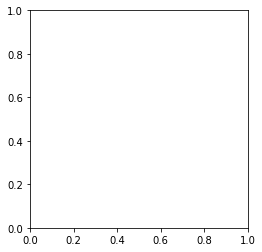

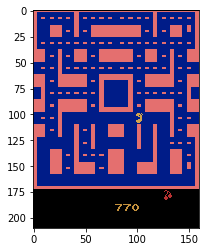

In [2]:

env = "MsPacman-v0" #Supported envs "MsPacman-v0" "CarRacing-v0" "Asteroids-v0" "snake"
n_iter = 0 #0 iter will cause the default n_iter for each game to load, otherwise, it will use the n_iter you specify

if n_iter == 0:
    if env == "MsPacman-v0":
        n_iter = 5
    elif env == "Asteroids-v0":
        n_iter = 3
    else:
        n_iter = 1

final_frame = None
if env == "MsPacman-v0":
    print("Running MsPacman test")
    args = configure_mspacman_test()
    final_frame = run_tests(args,"MsPacman_Example.gif",num_tests=n_iter)
elif env == "CarRacing-v0":
    print("Running CarRacing test")
    try:
        args = configure_carracing_test()
        final_frame =  run_tests(args,"CarRacing_Example.gif",num_tests=n_iter)
    except Exception as e:
        print("Failed to run CarRacing example,",str(e))
        print("CarRacing requires the Box2D Library, which can by tricky to install")
elif env.lower() == "snake":
    print("Running Snake test")
    #try:
    args = configure_snake_test()
    final_frame = run_tests(args,"Snake_Example.gif",num_tests=n_iter)
    #except Exception as e:
    #print("Failed to run Snake example,",str(e))
elif env == "Asteroids-v0":
    print("Running Asteroids test")
    args = configure_asteroids_test()
    final_frame = run_tests(args,"Asteroids_Example.gif",num_tests=n_iter)
else:
    print("Unsupported test environment %s"%(env))
    
    
if not final_frame is None:
    plt.imshow(final_frame)
    plt.show()